### ENPM662 HW2
Name: Hamza Shah Khan
UID: 119483152
email: hamzask@umd.edu
## Problem1: UR3 Velocity Kinemtics
 DH parameters:

In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

theta1, theta2, theta3, theta4, theta5, theta6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6')
d1, d2, d3, d4, d5, d6 = sp.symbols('d1 d2 d3 d4 d5 d6')
a1, a2, a3, a4, a5, a6 = sp.symbols('a1 a2 a3 a4 a5 a6')
alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 = sp.symbols('alpha1 alpha2 alpha3 alpha4 alpha5 alpha6')

# DH parameters
a1 = 0.0
alpha1 = sp.pi/2
d1 = 183.5

a2 = 737.31
alpha2 = 0.0
d2 = 0.0

a3 = 387.8
alpha3 = 0.0 #sp.pi TODO chnaged this to 0 and made 0 to 0.0
d3 = 0.0

a4 = 0.0
alpha4 = sp.pi/2
d4 = 95.5

a5 = 0.0
alpha5 = -sp.pi/2
d5 = 115.5

a6 = 0.0
alpha6 = 0.0
d6 = 4.5 #+ 76.8 #TODO Add some value

alpha1 = -sp.pi/2
alpha2 = sp.pi
alpha3 = sp.pi
alpha4 = sp.pi/2
alpha5 = -sp.pi/2
alpha6 = 0
d6 = 76.8 + 4.5

#project 2

a1 = 0
a2 = 0.24365
a3 = 0.21325
a4 = 0
a5 = 0
a6 = 0

d1 = 0.1519
d2 = 0
d3 = 0
d4 = 0.11235
d5 = 0.08535
d6 = 0.2352

alpha1 = -sp.pi/2
alpha2 = 0
alpha3 = 0
alpha4 = sp.pi/2
alpha5 = -sp.pi/2
alpha6 = 0


# Print the DH Table
dh_table = pd.DataFrame({
    'a': [a1, a2, a3, a4, a5, a6],
    'alpha': [alpha1, alpha2, alpha3, alpha4, alpha5, alpha6],
    'd': [d1, d2, d3, d4, d5, d6],
    'theta': [theta1, theta2, theta3, theta4, theta5, theta6]
})

print("DH Table:")
sp.pprint(dh_table)

DH Table:
         a  alpha        d   theta
0  0.00000  -pi/2  0.15190  theta1
1  0.24365      0  0.00000  theta2
2  0.21325      0  0.00000  theta3
3  0.00000   pi/2  0.11235  theta4
4  0.00000  -pi/2  0.08535  theta5
5  0.00000      0  0.23520  theta6


Homogenous Transformation Matrices

In [2]:
# Homogeneous transformation matrices
def dh_transform_matrix(theta, d, a, alpha):
    return sp.Matrix([
        [sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha), a*sp.cos(theta)],
        [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
        [0, sp.sin(alpha), sp.cos(alpha), d],
        [0, 0, 0, 1]
    ])

T1 = dh_transform_matrix(theta1-(sp.pi/2), d1, a1, alpha1)
T2 = dh_transform_matrix(theta2-(sp.pi/2), d2, a2, alpha2)
T3 = dh_transform_matrix(theta3, d3, a3, alpha3)
T4 = dh_transform_matrix(theta4+(sp.pi/2), d4, a4, alpha4)
T5 = dh_transform_matrix(theta5, d5, a5, alpha5)
T6 = dh_transform_matrix(theta6, d6, a6, alpha6)

T = T1 * T2 * T3 * T4 * T5 * T6

# Print the transformation matrces
eq1 = sp.Eq(sp.symbols('T0_1'),  T1, evaluate=False)
eq2 = sp.Eq(sp.symbols('T1_2'),  T2, evaluate=False)
eq3 = sp.Eq(sp.symbols('T2_3'),  T3, evaluate=False)
eq4 = sp.Eq(sp.symbols('T3_4'),  T4, evaluate=False)
eq5 = sp.Eq(sp.symbols('T4_5'),  T5, evaluate=False)
eq6 = sp.Eq(sp.symbols('T5_6'),  T6, evaluate=False)
eq7 = sp.Eq(sp.symbols('T0_6'),  T, evaluate=False)

print("Transformation Matrices:")
sp.pprint(eq1, use_unicode = True, wrap_line = False)
sp.pprint(eq2, use_unicode = True, wrap_line = False)
sp.pprint(eq3, use_unicode = True, wrap_line = False)
sp.pprint(eq4, use_unicode = True, wrap_line = False)
sp.pprint(eq5, use_unicode = True, wrap_line = False)
sp.pprint(eq6, use_unicode = True, wrap_line = False)

# Print the final transformation matrix
print("Final Transformation Matrix:")
sp.pprint(eq7,use_unicode = True, wrap_line = False)



Transformation Matrices:
       ⎡sin(θ₁)   0   cos(θ₁)    0   ⎤
       ⎢                             ⎥
       ⎢-cos(θ₁)  0   sin(θ₁)    0   ⎥
T₀ ₁ = ⎢                             ⎥
       ⎢   0      -1     0     0.1519⎥
       ⎢                             ⎥
       ⎣   0      0      0       1   ⎦
       ⎡sin(θ₂)   cos(θ₂)  0  0.24365⋅sin(θ₂) ⎤
       ⎢                                      ⎥
       ⎢-cos(θ₂)  sin(θ₂)  0  -0.24365⋅cos(θ₂)⎥
T₁ ₂ = ⎢                                      ⎥
       ⎢   0         0     1         0        ⎥
       ⎢                                      ⎥
       ⎣   0         0     0         1        ⎦
       ⎡cos(θ₃)  -sin(θ₃)  0  0.21325⋅cos(θ₃)⎤
       ⎢                                     ⎥
       ⎢sin(θ₃)  cos(θ₃)   0  0.21325⋅sin(θ₃)⎥
T₂ ₃ = ⎢                                     ⎥
       ⎢   0        0      1         0       ⎥
       ⎢                                     ⎥
       ⎣   0        0      0         1       ⎦
       ⎡-sin(θ₄)  0  cos(θ₄)     0   

#Validating The  Kinematic Model

In [3]:

# theta_home = [0, 0, 0, 0, 0, 0]

# T_home = T.subs({theta1:theta_home[0], theta2:theta_home[1], theta3:theta_home[2], theta4:theta_home[3], theta5:theta_home[4], theta6:theta_home[5]})

# eq = sp.Eq(sp.symbols('T0_6_home'),  T_home, evaluate=False)
# sp.pprint(eq)
# sp.pprint(T_home)
#Validating The  Kinematic Model
# Calculate the transformation matrices for the 5 critical points
theta_c_1 = [0, 0, 0, 0, 0, 0]
theta_c_2 = [sp.pi/2, 0, 0, 0, 0, 0]
# theta_c_2 = [0, sp.pi/2, 0, 0, 0, 0]
theta_c_3 = [0, 0, sp.pi/2, 0, 0, 0]
theta_c_4 = [0, 0, 0, sp.pi/2, 0, 0]
theta_c_5 = [0, 0, 0, 0, sp.pi/2, 0]

T_sub1 = T.subs({theta1:theta_c_1[0], theta2:theta_c_1[1], theta3:theta_c_1[2], theta4:theta_c_1[3], theta5:theta_c_1[4], theta6:theta_c_1[5]})
T_sub2 = T.subs({theta1:theta_c_2[0], theta2:theta_c_2[1], theta3:theta_c_2[2], theta4:theta_c_2[3], theta5:theta_c_2[4], theta6:theta_c_2[5]})
T_sub3 = T.subs({theta1:theta_c_3[0], theta2:theta_c_3[1], theta3:theta_c_3[2], theta4:theta_c_3[3], theta5:theta_c_3[4], theta6:theta_c_3[5]})
T_sub4 = T.subs({theta1:theta_c_4[0], theta2:theta_c_4[1], theta3:theta_c_4[2], theta4:theta_c_4[3], theta5:theta_c_4[4], theta6:theta_c_4[5]})
T_sub5 = T.subs({theta1:theta_c_5[0], theta2:theta_c_5[1], theta3:theta_c_5[2], theta4:theta_c_5[3], theta5:theta_c_5[4], theta6:theta_c_5[5]})


eq1 = sp.Eq(sp.symbols('T0_6_c1'),  T_sub1, evaluate=False)

eq2 = sp.Eq(sp.symbols('T0_6_c2'),  T_sub2, evaluate=False)
eq3 = sp.Eq(sp.symbols('T0_6_c3'),  T_sub3, evaluate=False)
eq4 = sp.Eq(sp.symbols('T0_6_c4'),  T_sub4, evaluate=False)
eq5 = sp.Eq(sp.symbols('T0_6_c5'),  T_sub5, evaluate=False)

# print(f"Joint Angles: {theta_c_1}")
# print("Transformation Matrix:")
# sp.pprint(eq1)
print(f"Joint Angles: {theta_c_3}")
print("Transformation Matrix:")
# sp.pprint(eq2)
sp.pprint(eq3)
# sp.pprint(eq4)
# sp.pprint(eq5)




Joint Angles: [0, 0, pi/2, 0, 0, 0]
Transformation Matrix:
           ⎡0   0  1  0.34755⎤
           ⎢                 ⎥
           ⎢0   1  0  -0.2986⎥
T_0_6_c3 = ⎢                 ⎥
           ⎢-1  0  0  0.39555⎥
           ⎢                 ⎥
           ⎣0   0  0     1   ⎦


# Problem 2 Velocity Kinematics: Finding Jacobian

Following method 1 to find Jacobian, involves the following steps:
The Jacobian Matrix is given by J_i = [Z_i-1 x (O_n - O_i-1), Z_i-1]
where Z_i-1 is the z-axis of the i-1th frame and O_i-1 is the origin of the i-1th frame
The Jacobian Matrix is a 6x6 matrix, with each column representing the Jacobian of the ith joint
The Final Jacobian Matrix is given by J = [J_1, J_2, J_3, J_4, J_5, J_6]

In [4]:
# Problem 2 Velocity Kinematics: Finding Jacobian

#Following method 1 to find Jacobian, involves the following steps:
#The Jacobian Matrix is given by J_i = [Z_i-1 x (O_n - O_i-1), Z_i-1]
#where Z_i-1 is the z-axis of the i-1th frame and O_i-1 is the origin of the i-1th frame
#The Jacobian Matrix is a 6x6 matrix, with each column representing the Jacobian of the ith joint
#The Final Jacobian Matrix is given by J = [J_1, J_2, J_3, J_4, J_5, J_6]

#Step1 : Calculate Tranformation matrices T_0_i
T_0_1 =  T1 
T_0_2 = T_0_1 * T2
T_0_3 = T_0_2 * T3
T_0_4 = T_0_3 * T4
T_0_5 = T_0_4 * T5
T_0_6 = T_0_5 * T6

#Step2 : Calculate O_i
O_0 = sp.Matrix([0,0,0])
O_1 = T_0_1[:3,3]
O_2 = T_0_2[:3,3]
O_3 = T_0_3[:3,3]
O_4 = T_0_4[:3,3]
O_5 = T_0_5[:3,3]
O_6 = T_0_6[:3,3]

#Step3 : Calculate Z_i
Z_0 = sp.Matrix([0,0,1])
Z_1=T_0_1[:3,2]
Z_2=T_0_2[:3,2]
Z_3=T_0_3[:3,2]
Z_4=T_0_4[:3,2]
Z_5=T_0_5[:3,2]
# Z_6=T_0_6[:3,2]

#Printing all Z and O componets
eq1 = sp.Eq(sp.symbols('O_0'),  O_0, evaluate=False)
eq2 = sp.Eq(sp.symbols('O_1'),  O_1, evaluate=False)
eq3 = sp.Eq(sp.symbols('O_2'),  O_2, evaluate=False)
eq4 = sp.Eq(sp.symbols('O_3'),  O_3, evaluate=False)
eq5 = sp.Eq(sp.symbols('O_4'),  O_4, evaluate=False)
eq6 = sp.Eq(sp.symbols('O_5'),  O_5, evaluate=False)
eq7 = sp.Eq(sp.symbols('O_6'),  O_6, evaluate=False)

eq8 = sp.Eq(sp.symbols('Z_0'),  Z_0, evaluate=False)
eq9 = sp.Eq(sp.symbols('Z_1'),  Z_1, evaluate=False)
eq10 = sp.Eq(sp.symbols('Z_2'),  Z_2, evaluate=False)
eq11 = sp.Eq(sp.symbols('Z_3'),  Z_3, evaluate=False)
eq12 = sp.Eq(sp.symbols('Z_4'),  Z_4, evaluate=False)
eq13 = sp.Eq(sp.symbols('Z_5'),  Z_5, evaluate=False)


sp.pprint(eq1,use_unicode = True, wrap_line = False)
sp.pprint(eq2,use_unicode = True, wrap_line = False)
sp.pprint(eq3,use_unicode = True, wrap_line = False)
sp.pprint(eq4,use_unicode = True, wrap_line = False)
sp.pprint(eq5,use_unicode = True, wrap_line = False)
sp.pprint(eq6,use_unicode = True, wrap_line = False)
sp.pprint(eq7,use_unicode = True, wrap_line = False)
sp.pprint(eq8,use_unicode = True, wrap_line = False)
sp.pprint(eq9,use_unicode = True, wrap_line = False)
sp.pprint(eq10,use_unicode = True, wrap_line = False)
sp.pprint(eq11,use_unicode = True, wrap_line = False)
sp.pprint(eq12,use_unicode = True, wrap_line = False)
sp.pprint(eq13,use_unicode = True, wrap_line = False)

#Step4 : Calculate Jacobian J_i
J_1 = sp.Matrix([Z_0.cross(O_6 - O_0), Z_0])
J_2 = sp.Matrix([Z_1.cross(O_6 - O_1), Z_1])
J_3 = sp.Matrix([Z_2.cross(O_6 - O_2), Z_2])
J_4 = sp.Matrix([Z_3.cross(O_6 - O_3), Z_3])
J_5 = sp.Matrix([Z_4.cross(O_6 - O_4), Z_4])
J_6 = sp.Matrix([Z_5.cross(O_6 - O_5), Z_5])

#Step5 : Combine Jacobians to get J
J_mat1 = sp.Matrix([[J_1.T], [J_2.T], [J_3.T], [J_4.T], [J_5.T], [J_6.T]])

J_mat1 = J_mat1.T

eq1 = sp.Eq(sp.symbols('Jacobian'),  J_mat1, evaluate=False)
sp.pprint(eq1, use_unicode=True, wrap_line = False)






     ⎡0⎤
     ⎢ ⎥
O₀ = ⎢0⎥
     ⎢ ⎥
     ⎣0⎦
     ⎡  0   ⎤
     ⎢      ⎥
O₁ = ⎢  0   ⎥
     ⎢      ⎥
     ⎣0.1519⎦
     ⎡0.24365⋅sin(θ₁)⋅sin(θ₂) ⎤
     ⎢                        ⎥
O₂ = ⎢-0.24365⋅sin(θ₂)⋅cos(θ₁)⎥
     ⎢                        ⎥
     ⎣0.24365⋅cos(θ₂) + 0.1519⎦
     ⎡0.21325⋅sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) + 0.24365⋅sin(θ₁)⋅sin(θ₂) + 0.21325⋅sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) ⎤
     ⎢                                                                                            ⎥
O₃ = ⎢-0.21325⋅sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) - 0.24365⋅sin(θ₂)⋅cos(θ₁) - 0.21325⋅sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)⎥
     ⎢                                                                                            ⎥
     ⎣       -0.21325⋅sin(θ₂)⋅sin(θ₃) + 0.21325⋅cos(θ₂)⋅cos(θ₃) + 0.24365⋅cos(θ₂) + 0.1519        ⎦
     ⎡0.21325⋅sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) + 0.24365⋅sin(θ₁)⋅sin(θ₂) + 0.21325⋅sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + 0.11235⋅cos(θ₁)⎤
     ⎢                                                                                                      

In [5]:
#Using method 2 to calculate Jacobian

#Step1 : Calculate Tranformation matrices T_0_i
T_0_1 =  T1 
T_0_2 = T_0_1 * T2
T_0_3 = T_0_2 * T3
T_0_4 = T_0_3 * T4
T_0_5 = T_0_4 * T5
T_0_6 = T_0_5 * T6

#Step2: Calculate P

P_mat = T_0_6[:3,3]

P_mat_diff_theta1 = sp.diff(P_mat, theta1)
P_mat_diff_theta2 = sp.diff(P_mat, theta2)
P_mat_diff_theta3 = sp.diff(P_mat, theta3)
P_mat_diff_theta4 = sp.diff(P_mat, theta4)
P_mat_diff_theta5 = sp.diff(P_mat, theta5)
P_mat_diff_theta6 = sp.diff(P_mat, theta6)


#Step3 : Calculate Z_i

Z_1=T_0_1[:3,2]
Z_2=T_0_2[:3,2]
Z_3=T_0_3[:3,2]
Z_4=T_0_4[:3,2]
Z_5=T_0_5[:3,2]
Z_6=T_0_6[:3,2]

#Step4 : Calculate Jacobian J_i

J_1 = sp.Matrix([[P_mat_diff_theta1], [Z_1]])
J_2 = sp.Matrix([[P_mat_diff_theta2], [Z_2]])
J_3 = sp.Matrix([[P_mat_diff_theta3], [Z_3]])
J_4 = sp.Matrix([[P_mat_diff_theta4], [Z_4]])
J_5 = sp.Matrix([[P_mat_diff_theta5], [Z_5]])
J_6 = sp.Matrix([[P_mat_diff_theta6], [Z_6]])

#Step5 : Combine Jacobians to get J
J_mat2 = sp.Matrix([[J_1, J_2, J_3, J_4, J_5, J_6]])


print("Jacobian using Method 2")
sp.pprint(J_mat2, use_unicode=True, wrap_line = False)

#Checking if both methods give same Jacobian
J_diff = J_mat2 - J_mat1
print("Difference in Jacobians using both methods")
sp.pprint(J_diff, use_unicode=True, wrap_line = False)



Jacobian using Method 2
⎡-0.2352⋅((-sin(θ₂)⋅sin(θ₃)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) - (sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) + sin(θ₃)⋅cos(θ₁)⋅cos(θ₂))⋅sin(θ₄))⋅sin(θ₅) + 0.08535⋅(-sin(θ₂)⋅sin(θ₃)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅sin(θ₄) + 0.08535⋅(sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) + sin(θ₃)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₄) - 0.2352⋅sin(θ₁)⋅cos(θ₅) - 0.11235⋅sin(θ₁) + 0.21325⋅sin(θ₂)⋅cos(θ₁)⋅cos(θ₃) + 0.24365⋅sin(θ₂)⋅cos(θ₁) + 0.21325⋅sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)  -0.2352⋅(-(-sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅sin(θ₄) + (-sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂))⋅cos(θ₄))⋅sin(θ₅) + 0.08535⋅(-sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) + 0.08535⋅(-sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂))⋅sin(θ₄) - 0.21325⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + 0.21325⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + 0.24365⋅sin(θ₁)⋅cos(θ₂)  -0.2352⋅(-(-sin(θ₁)⋅sin(θ₂)⋅sin(θ₃) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₃))⋅sin(θ₄) + (-sin(θ₁)⋅sin(θ₂)⋅cos(θ₃) - sin(θ₁)⋅sin(θ₃)⋅cos(θ₂))⋅cos(θ₄))⋅sin(θ₅) + 0.08535⋅(-sin(θ₁)⋅sin(θ₂)⋅sin(

In [6]:
q_intial = np.array([0,sp.pi/2,0,sp.pi/2,0,0])
q_intial = np.array([0,0,0,0,0,0])
T_sub = T.subs({theta1:q_intial[0], theta2:q_intial[1], theta3:q_intial[2], theta4:q_intial[3], theta5:q_intial[4], theta6:q_intial[5]}).evalf()

sp.pprint(T_sub,use_unicode = True, wrap_line = False)

J_matrix_initial = J_mat2.subs({theta1:q_intial[0], theta2:q_intial[1], theta3:q_intial[2], theta4:q_intial[3], theta5:q_intial[4], theta6:q_intial[5]}).evalf()

sp.pprint(J_matrix_initial)

# J_inv = J_matrix_initial.pinv()

# sp.pprint(J_matrix_initial)
# J_matrix_initial.rank()

⎡ 0     0    1.0  0.34755⎤
⎢                        ⎥
⎢-1.0   0     0      0   ⎥
⎢                        ⎥
⎢ 0    -1.0   0   0.69415⎥
⎢                        ⎥
⎣ 0     0     0     1.0  ⎦
⎡   0        0         0        0        0      0 ⎤
⎢                                                 ⎥
⎢0.34755  -0.54225  -0.2986  -0.08535  0.2352   0 ⎥
⎢                                                 ⎥
⎢   0        0         0        0        0      0 ⎥
⎢                                                 ⎥
⎢  1.0      1.0       1.0       0       1.0    1.0⎥
⎢                                                 ⎥
⎢   0        0         0        0        0      0 ⎥
⎢                                                 ⎥
⎣   0        0         0       1.0       0      0 ⎦


# Problem 3: Inverse Kinematics

To calculate the trajectory of the semi circle and the rectangular path, we have the equations:

For the semi-circle:
        W = sp.pi  / t_semi            (Angular velocity)

        x = h + r * sp.cos(W*t)
        y = k + r * sp.sin(W*t)

        Differentiating this, will get us the required position velocities x_dot, y_dot

        x_dot = - r * W * np.sin(W * t)
        y_dot = r * W * np.cos(W * t)

For the rectangle:

        The parametric equation for a line joining two points (x1,y1),(x2,y2):
        v= linear velocity
        d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        x =  v * (x2-x1) *t / d + x1
        y = v * (y2-y1) * t /d + y1

        Differentiating this, will get us the required position velocities x_dot, y_dot    :
        x_dot = v * (x2-x1) / d
        y_dot = v * (y2-y1) / d    


In [10]:
def forward_kinematics(joint_angles):
    #Calculate the transformation matrix
    T_matrix = T.subs({theta1:joint_angles[0], theta2:joint_angles[1], theta3:joint_angles[2], theta4:joint_angles[3], theta5:joint_angles[4], theta6:joint_angles[5]}).evalf()
    #Extract the position of the end effector
    X = T_matrix[0,3]
    Y = T_matrix[1,3]
    Z = T_matrix[2,3]
    return np.array([X, Y, Z])

joint_angles = np.array([0,-sp.pi/2,sp.pi/2,0,0,0])
end_effector_pos= forward_kinematics(joint_angles)
print(f"End effector position: {end_effector_pos}")

End effector position: [0.347550000000000 0.243650000000000 0.450500000000000]


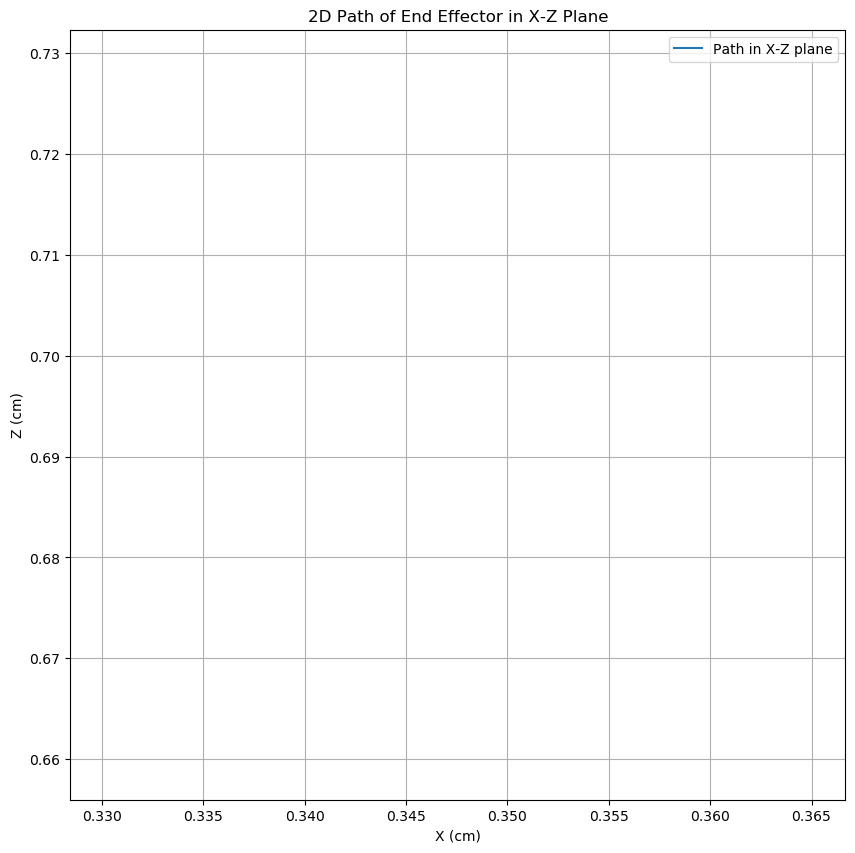

In [17]:
import math

def rec_pose_velocity(x1, y1, x2, y2, v):
    d = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    x_dot = v * (x2-x1) / d
    y_dot = v * (y2-y1) / d
    return x_dot, y_dot

def pose_vel(t):
    # global h, k, r, v, path_x, path_y, path_z

    # print(t)
    if t < t_semi and t >= 0:
        # print("Semicircle")
        #For Semi circle
        x_dot = - r * W * np.sin(W * t)
        y_dot = r * W * np.cos(W * t)
        return x_dot, y_dot

    elif t >= t_semi and t <= total_time:
        t_rect_segment = t - t_semi

        #semicricle to point A: (h-r,k) to (h-r,k-r)
        if t_rect_segment >= 0 and t_rect_segment < t1:
            # print("Point o to A")
            x_dot, y_dot = rec_pose_velocity(h - r, k, h - r, k - r, v)
            return x_dot, y_dot
        
        #Pause at point A
        elif t_rect_segment >= t1 and t_rect_segment < t1 + pause_time:
            # print("Pause at A")
            x_dot = 0
            y_dot = 0
            return x_dot, y_dot
        
        #point A to point B: (h-r,k-r) to (h+r,k-r)
        elif (t_rect_segment >= t1 + pause_time) and (t_rect_segment < t1 + pause_time + t2):
            # print("A to B")
            x_dot, y_dot = rec_pose_velocity(h - r, k - r, h + r, k - r, v)
            return x_dot, y_dot
        
        #Pause at point B
        elif t_rect_segment >= t1 + pause_time + t2 and t_rect_segment < t1 + pause_time + t2 + pause_time:
            # print("Pause at B")
            x_dot = 0
            y_dot = 0
            return x_dot, y_dot
        
        #point B to point S: (h+r,k-r) to (h+r,k-r)
        elif (t_rect_segment >= t1 + pause_time+ t2 + pause_time) and (t_rect_segment < t1 + t2 + t3 + 2*pause_time):
            # print("B to S")
            x_dot, y_dot = rec_pose_velocity(h + r, k - r, h + r, k, v)
            return x_dot, y_dot
        
        #Pause at point S
        elif t_rect_segment >= t1 + t2 + t3 + 2*pause_time and t_rect_segment < t1 + t2 + t3 + 3*pause_time:
            # print("Pause at S")
            x_dot = 0
            y_dot = 0
            return x_dot, y_dot
        
#TEST
def circle_velocity(t):
    # print(W*t)
    x_dot = - r  * W * sp.sin(W*t)
    y_dot = r * W * sp.cos(W*t)
    if t == total_time:
        x_dot = 0
        y_dot = 0
    return x_dot, y_dot

def line_velocity(t):
    X_dot, Z_dot = rec_pose_velocity(h - r, k, h + r, k, v)
    # Y_dot = 0
    return X_dot, Z_dot

#Center of circle

h,k = 0.0,1424.11
r = 5
rec_width = 10
rec_height = r
pause_time = 1
total_time = 20

semi_circle_length = np.pi * r
rectangle_length = 2*rec_height + rec_width
total_length = semi_circle_length + rectangle_length
t_semi = total_time * semi_circle_length / total_length
t_rect = total_time - t_semi
t_rect_moving = t_rect - 2*pause_time

t1 = t_rect_moving * rec_height / rectangle_length
t2 = t_rect_moving * rec_width / rectangle_length
t3 = t_rect_moving * rec_height / rectangle_length

semi_circle_vel = semi_circle_length / t_semi
# W = np.pi/total_time
W = np.pi/t_semi
rect_vel = rectangle_length / t_rect_moving
v = rect_vel

samples = 1000
t_samples = np.linspace(0,total_time,samples)
# t_samples = np.linspace(0,180,samples)
time_step = total_time / samples
path_x = []
path_y = []
path_z = []


V_matrix_vals = []
q_dot_values = []
q_mat_values = []


# q_matrix = sp.Matrix([0,sp.pi/2,0,sp.pi/2,0,0])
q_matrix = sp.Matrix([0.0,0.0,0.0,0.0,0.0,0.0])

J = J_mat1

for t in t_samples:
    # print(trajectory(t))
    X_dot, Z_dot = pose_vel(t)

    if t <= t_semi and path_x:
        h , k = path_x[-1], path_y[-1]
    #Getting the position velocities
    # X_dot, Z_dot = circle_velocity(t)
    # X_dot, Z_dot = line_velocity(t)
    Y_dot = 0.0

    #Position velocitiy Matrix
    V_matrix = sp.Matrix([X_dot, Y_dot, Z_dot, 0.0, 0.0, 0.0])

    #Update the jacobian with the new joint angles
    J_matrix = J.subs({theta1:q_matrix[0], theta2:q_matrix[1], theta3:q_matrix[2], theta4:q_matrix[3], theta5:q_matrix[4], theta6:q_matrix[5]})

    #Calculate the pseudo inverse of the jacobian
    J_inv = J_matrix.pinv()

    #Calculate the joint velocities
    q_dot = (J_matrix.pinv() * V_matrix).evalf()

    #Update the joint angles
    q_matrix = q_matrix + (q_dot * time_step)

    q_dot_values.append(q_dot)
    V_matrix_vals.append(V_matrix)
    q_mat_values.append(q_matrix)

    #Calculate the transformation matrix
    T_matrix = T.subs({theta1:q_matrix[0], theta2:q_matrix[1], theta3:q_matrix[2], theta4:q_matrix[3], theta5:q_matrix[4], theta6:q_matrix[5]}).evalf()

    #Extract the position of the end effector
    X = T_matrix[0,3]
    Y = T_matrix[1,3]
    Z = T_matrix[2,3]

    #Store the position of the end effector
    path_x.append(X)
    path_y.append(Y)
    path_z.append(Z)



#2D Plot
plt.figure(figsize=(10, 10))
plt.plot(path_x, path_z, label='Path in X-Z plane')
# plt.scatter([h], [k], color="orange", label="Center (h, k)")
# plt.scatter([h - r, h - r, h + r, h + r], [k, k - r, k - r, k], color="red", label="Rectangle Vertices")
plt.xlabel('X (cm)')
plt.ylabel('Z (cm)')
plt.title('2D Path of End Effector in X-Z Plane')
plt.legend()
plt.grid(True)
plt.show()


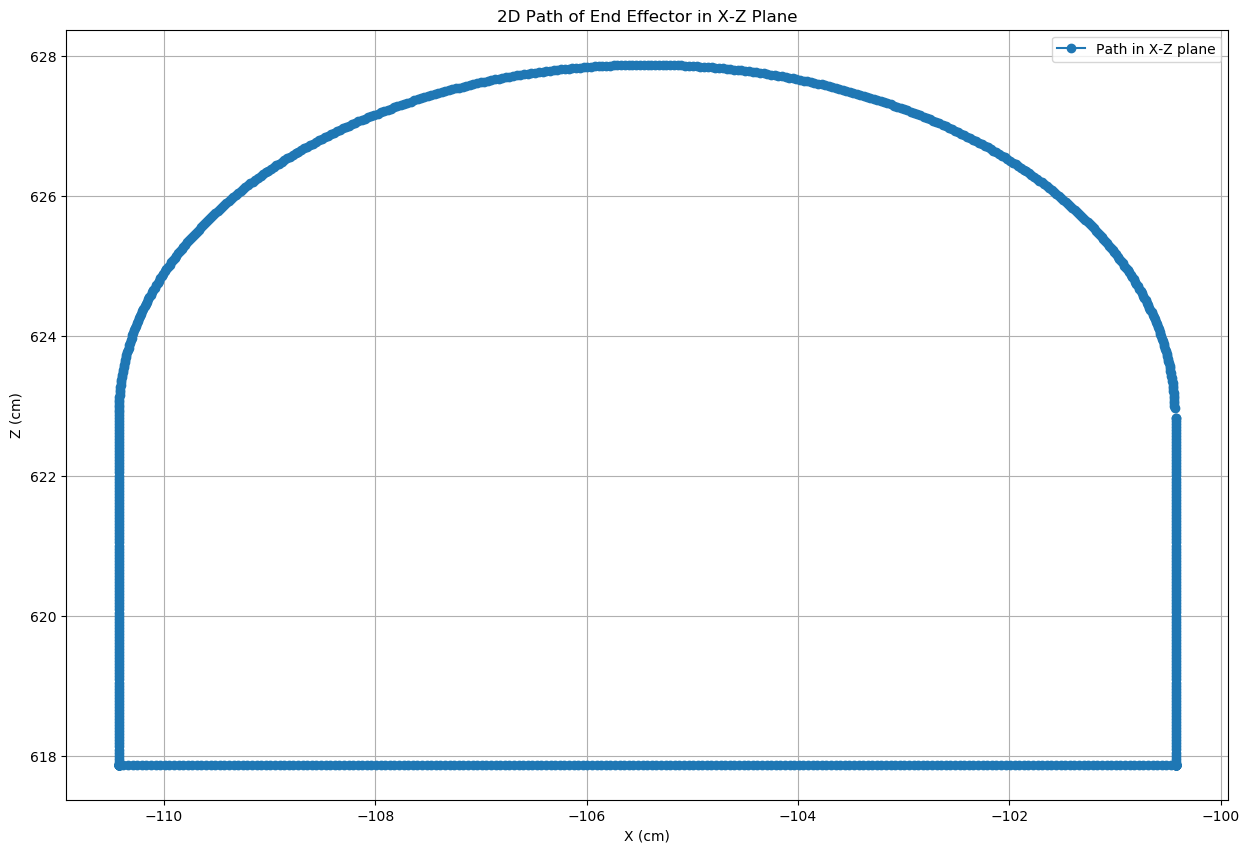

In [8]:

#2D Plot without initial positions
# h,k = 0.0,1424.11
plt.figure(figsize=(15, 10))
plt.plot(path_x[2:], path_z[2:], label='Path in X-Z plane', marker='o')
# plt.scatter([h], [k], color="orange", label="Center (h, k)")
# plt.scatter([h - r, h - r, h + r, h + r], [k, k - r, k - r, k], color="red", label="Rectangle Vertices")
plt.xlabel('X (cm)')
plt.ylabel('Z (cm)')
plt.title('2D Path of End Effector in X-Z Plane')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Plot the 3D path
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(path_x, path_y, path_z, label='End Effector Path')
ax.scatter([h], [k], [0], color="red", label="Center (h, k)")
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title('3D Path of End Effector')
ax.legend()
plt.show()

ValueError: Unknown projection '3d'

<Figure size 1000x1000 with 0 Axes>